# Программирование на Python
## Семинар 8. Python для анализа данных
#### Задача 1
Вам дан массив данных, представленный в виде списка списков. Каждый вложенный список представляет собой измерение одного параметра для разных индивидуумов. В процессе обработки данных вам часто придется сталкиваться с тем, что параметры могут иметь разную шкалу. Существуют различные способы решения данной проблемы, среди которых - т. н. стандартизация, приводящее значения к стандартному нормальному распределению (большинство значений от -3 до 3). Формула выглядит следующим образом (в данном случае `x` - каждое значение, т. е. операцию ниже необходимо выполнить с каждым значением наших данных):

![standardization](https://i.ibb.co/THbWKqM/1-YSAAU-v-I8-Ol-HQz-G5-A1-Sg.png)

Напишите функцию, которая выполняет эту стандартизацию для двухмерного массива. При этом должна быть предусмотрена возможность осуществить это по строкам, по колонкам и для всего массива в целом.

Решите задачу в двух вариантах: 1) используя ТОЛЬКО встроенные средства Python и 2) с помощью `numpy`. Сравните эффективность двух подходов.

In [2]:
import numpy as np

# (псевдо)случайно генерируем матрицу 10 * 10000 из равномерного распределения с границами от -1000 до 1000
simulated_data = np.random.uniform(-1000, 1000, (10, 10000))
simulated_data_list = simulated_data.tolist()

**Python**

In [3]:
def mean(vector):
    return sum(vector) / len(vector)

def std(vector):
    vector_mean = mean(vector)
    vector_std = (sum([(x - vector_mean) ** 2 for x in vector]) / len(vector)) ** (1 / 2)

    return vector_std

def standardize1d(vector):
    vector_mean = mean(vector)
    vector_sd = std(vector)
    
    vector_std = [(x - vector_mean) / vector_sd for x in vector]

    return vector_std

def standardize(matrix):
    return [standardize1d(vector) for vector in matrix]

In [29]:
simulated_data_list_sd = standardize(simulated_data_list)

In [4]:
%%timeit
simulated_data_list_sd = standardize(simulated_data_list)

7.97 ms ± 28.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**NumPy**

In [7]:
simulated_data.size

100000

In [6]:
simulated_data.shape

(10, 10000)

In [31]:
%%timeit
n_rows = simulated_data.shape[0]

means = simulated_data.mean(axis=1).reshape((n_rows, 1))
stds = simulated_data.std(axis=1).reshape((n_rows, 1))

simulated_data_std = (simulated_data - means) / stds

160 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [20]:
means.shape

(10,)

In [23]:
means.reshape((10, 1))

array([[ 0.04790673],
       [ 5.12854698],
       [-3.98848723],
       [-2.1937482 ],
       [-6.48586082],
       [-9.74727056],
       [ 2.44615233],
       [-1.54783524],
       [ 0.08228267],
       [ 8.99893467]])

In [24]:
simulated_data - means.reshape((10, 1))

array([[-588.86136521,  582.3442177 , -850.28044123, ...,  921.05202814,
          10.42308749, -761.49291579],
       [ -63.74822235,  -89.79287153,  923.07805173, ..., -746.46578641,
        -729.39649998, -265.9508967 ],
       [ 404.79319765, -882.15460697, -946.22642183, ..., -388.76498264,
         716.01905256,  327.24052581],
       ...,
       [ 497.56828704, -647.01112677,  654.59338139, ..., -522.36118802,
         855.28575335,  496.46639058],
       [-322.2363365 , -313.97956971, -279.84498165, ...,  -71.14285719,
          71.76106779,  133.9982277 ],
       [-258.97318248,  226.69325403,  691.401883  , ...,  299.78351125,
         400.31791866, -904.39099707]])

In [18]:
simulated_data - means

ValueError: operands could not be broadcast together with shapes (10,10000) (10,) 

#### Задача 2
Используя средства numpy, проведите вычислительный эксперимент и выясните, можно ли считать статистически значимым результат проверки одной из выдвинутых на прошлом занятии гипотез.

**Data source:** https://www.kaggle.com/datasets/spscientist/students-performance-in-exams.

**Columns:**
- `gender` (binary variable);
- `race/ethnicity` (categorical variable);
- `parental level of education` (categorical variable, student's parents' level of education);
- `lunch` (categorical variable, quality of student's lunch);
- `test preparation course` (categorical variable, whether student managed to complete preparation course for the test);
- `math score` (numeric variable, score for Math test);
- `reading score` (numeric variable, score for Reading part);
- `writing score` (numeric variable, score for Writing part).

#### Задание 1
Загрузите файл StudentsPerformance.csv используя модуль `csv` и возможности модуля `collections`. Не забудьте о том, что для удобства числовые типы данных будет удобнее привести сразу. На выходе должен получиться словарь с ключами-названиями колонок и значениями-колонками.

In [3]:
import csv
from collections import defaultdict

def group(vector, grouping):
    grouped = defaultdict(list)
    
    for v, g in zip(vector, grouping):
        grouped[g].append(v)

    return grouped

def aggregate(grouped, fun):
    aggregated = {key: fun(value) for key, value in grouped.items()}

    return aggregated

path = '../Занятие 1/StudentsPerformance.csv'
int_cols = ['math score', 'reading score', 'writing score']
data = defaultdict(list)

with open(path, mode='r', newline='') as file:
    csvfile = csv.DictReader(file, delimiter=',')

    for dct in csvfile:
        for key, value in dct.items():
            if key in int_cols:
                data[key].append(int(value))
            else:
                data[key].append(value)

In [35]:
len(data['math score'])

1000

In [4]:
math_grouped_by_cource = group(data['math score'], data['test preparation course'])
agg = aggregate(math_grouped_by_cource, np.mean)
agg

{'none': 64.0778816199377, 'completed': 69.69553072625699}

In [14]:
current_diff = agg['completed'] - agg['none']
current_diff

5.617649106319291

In [ ]:
# H0: различия на самом деле нет, все по случайным причинам

# ВОПРОС: какие вообще значения разницы могут получаться по случайным причинам? Насколько текущее значение (реально полученное)
# от них отличается?

# ЗАДАЧА: получить распределение "разниц" при условии, что они возникают только "случайно"

In [5]:
none = np.array(math_grouped_by_cource['none'])
completed = np.array(math_grouped_by_cource['completed'])

In [7]:
concat = np.concatenate((none, completed))
permutated = np.random.permutation(concat)
array1_new, array2_new = permutated[:none.size], permutated[none.size:]

In [ ]:
# объединим два массива
# перемешаем значения в них
# разделим обратно на массивы таких же размеров
# посчитаем разницу в средних
# повторить эксперимент N раз

In [9]:
def simulate_diff(vector1, vector2):
    concat = np.concatenate((vector1, vector2))
    permutated = np.random.permutation(concat)
    array1_new, array2_new = permutated[:vector1.size], permutated[vector1.size:]
    simulated_diff = array2_new.mean() - array1_new.mean()

    return simulated_diff

N = 100000

simulated_diffs = np.array([simulate_diff(none, completed) for i in range(N)])

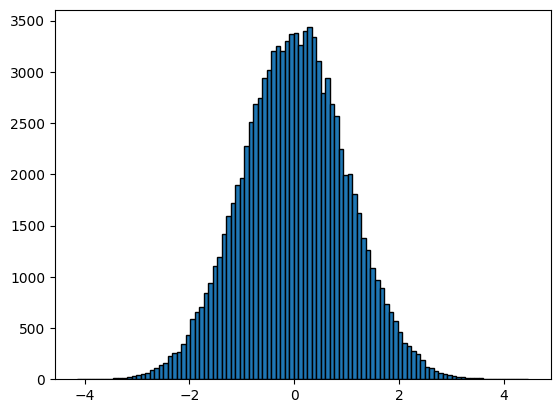

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(simulated_diffs, bins=100, edgecolor='black');

In [15]:
current_diff

5.617649106319291

In [ ]:
# реальное (наблюдаемое) значение НЕ вписывается в распределение случайных -> вероятность встретить такое случайно (H0) крайне мала ->
# изначальное предположение о том, что разница случайна следует отвергнуть -> подготовка помогает (очень смело)

#### Задача 3
Сделайте данное вам ниже изображение черно-белым.

/var/folders/h6/lv17v1r10lz21g745pd6774h0tgc4z/T/ipykernel_4367/3783902954.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = imread('./google_maps.png')


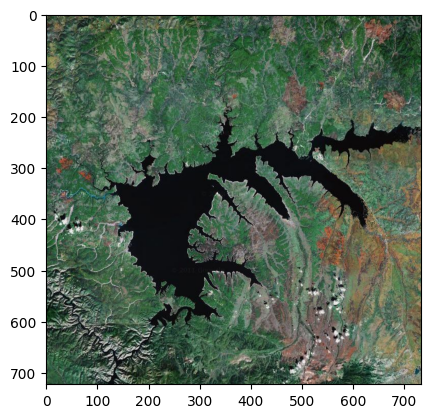

In [16]:
from imageio import imread
import matplotlib.pyplot as plt

img1 = imread('./google_maps.png')
plt.imshow(img1);

In [18]:
img1.shape

(723, 733, 3)

In [27]:
7 * 8;

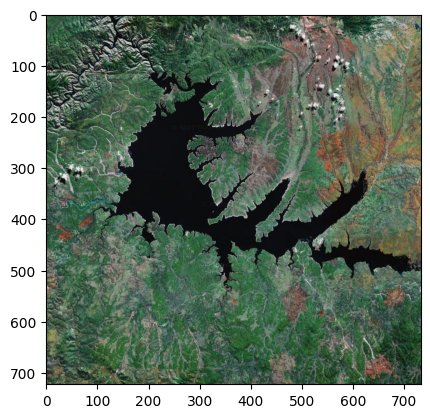

In [24]:
plt.imshow(img1[::-1, :, :]);

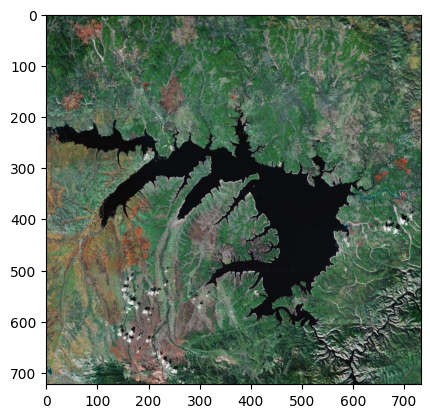

In [22]:
plt.imshow(img1[:, ::-1, :]);

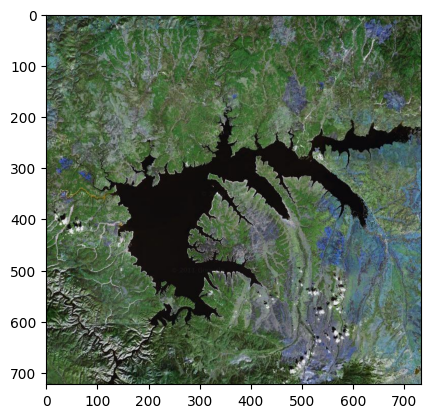

In [28]:
plt.imshow(img1[:, :, ::-1]);

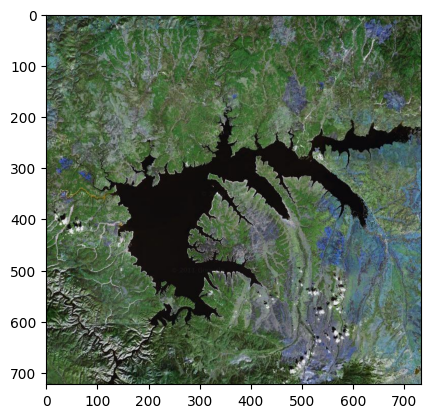

In [31]:
plt.imshow(img1[..., ::-1]);

In [32]:
# вместо r, g, b вставить среднее значение по пикселю

In [33]:
img1.shape

(723, 733, 3)

In [42]:
means = img1.mean(axis=2).round().astype(int)
img2 = np.repeat(means.reshape((*means.shape, 1)), 3, axis=2)

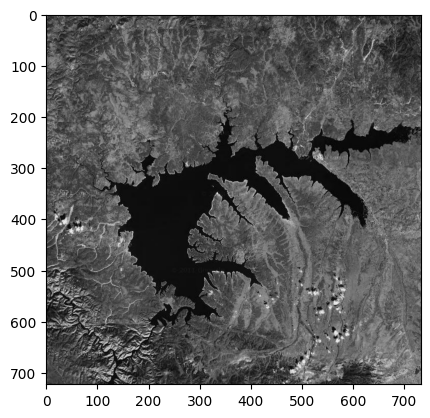

In [43]:
plt.imshow(img2);